In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_absolute_percentage_error as mape #利用mape评估模型的时候会使用
from statsmodels.tsa.seasonal import seasonal_decompose


In [254]:
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv(r"D:\Smz-Work\Python-DA\Stata\Total-automotive-cost-of-revenues.csv", 
                   parse_dates=['time'], index_col='time')

In [255]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

data = data.rename(columns={'time':'ds', 'Cost':'y'})
data = data.rename(columns={'Year':'ds'})
data['ds']=data.index
data['ds']= pd.to_datetime(data['ds'])
#data['y'] = (data['y'] - data['y'].mean()) / (data['y'].std())

orig_data = pd.read_csv(r"D:\Smz-Work\Python-DA\Stata\Total-automotive-cost-of-revenues-All.csv", 
                        parse_dates=['time'], index_col='time')
#orig_data['Cost']=(orig_data['Cost']-orig_data['Cost'].mean())/orig_data['Cost'].std()

In [295]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

09:15:36 - cmdstanpy - INFO - Chain [1] start processing
09:15:36 - cmdstanpy - INFO - Chain [1] done processing


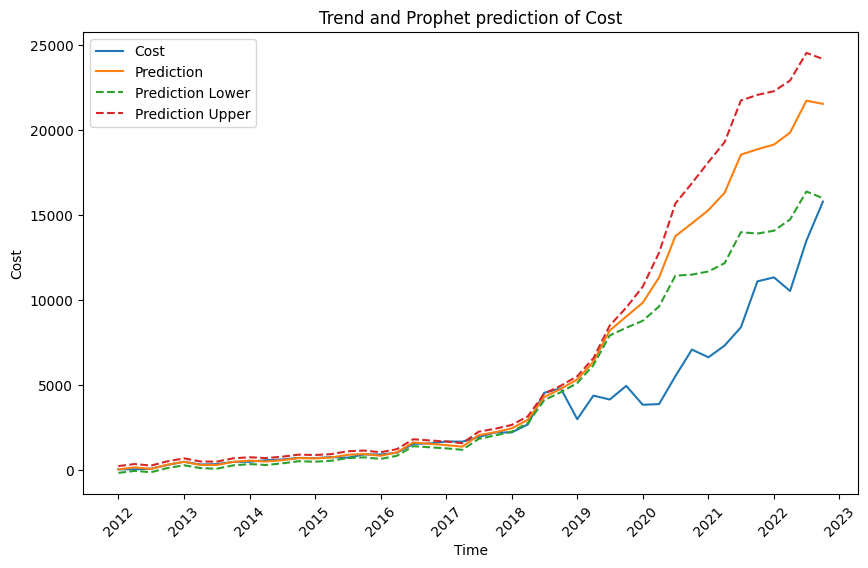

In [296]:
data['cap'] = 5 * data['y'].max()

model = Prophet(growth = 'logistic', seasonality_mode="additive", #multiplicative
                weekly_seasonality=False,
                interval_width=0.9,
                n_changepoints=4,
                changepoint_range=0.85,
                seasonality_prior_scale=0.5,
                changepoint_prior_scale=2
               )#logistic

model.add_seasonality(name='custom_seasonality', period=365, fourier_order=6)
model.fit(data)

future_dates = model.make_future_dataframe(16, 'QS')
future_dates['cap']= 5* data['y'].max()
forecast = model.predict(future_dates)

#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)

sns.lineplot(x=orig_data.index, y="Cost",err_style="bars", ci=68, data=orig_data, label="Cost")
sns.lineplot(x=forecast.ds, y="yhat",err_style="bars", ci=68, data=forecast, label="Prediction")
sns.lineplot(x=forecast.ds, y="yhat_lower",err_style="bars", linestyle="dashed", data=forecast, label="Prediction Lower")
sns.lineplot(x=forecast.ds, y="yhat_upper",err_style="bars", linestyle="dashed", data=forecast, label="Prediction Upper")
sns.utils.axlabel("Time", "Cost")

plt.title("Trend and Prophet prediction of Cost")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.legend()


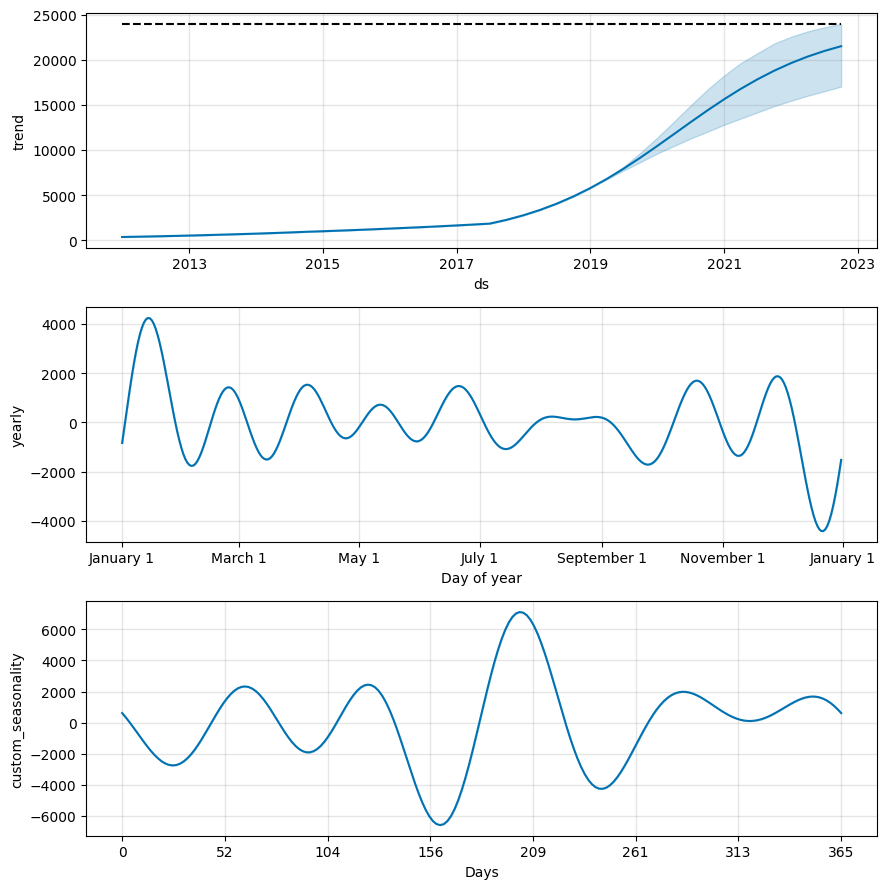

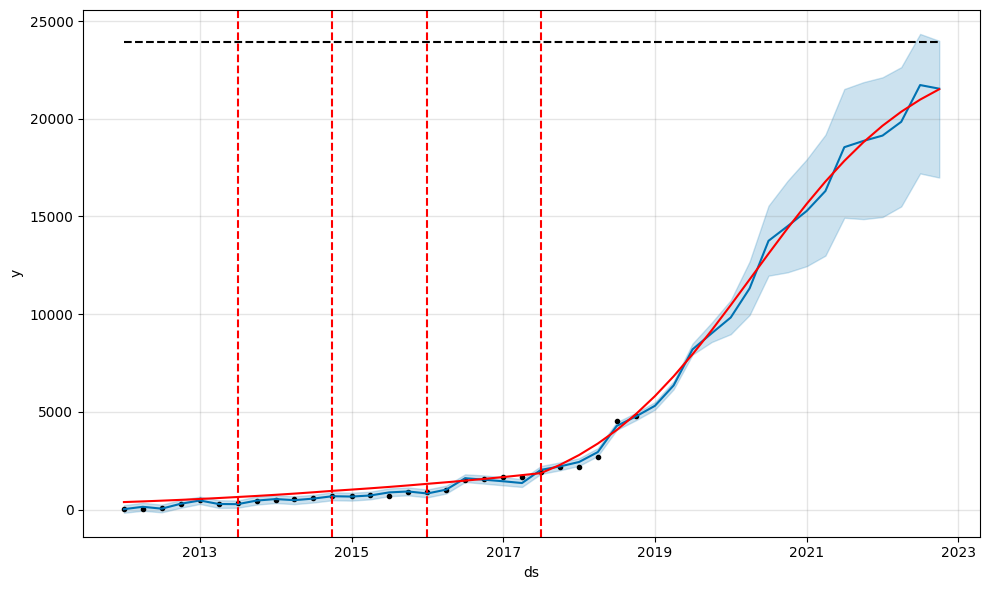

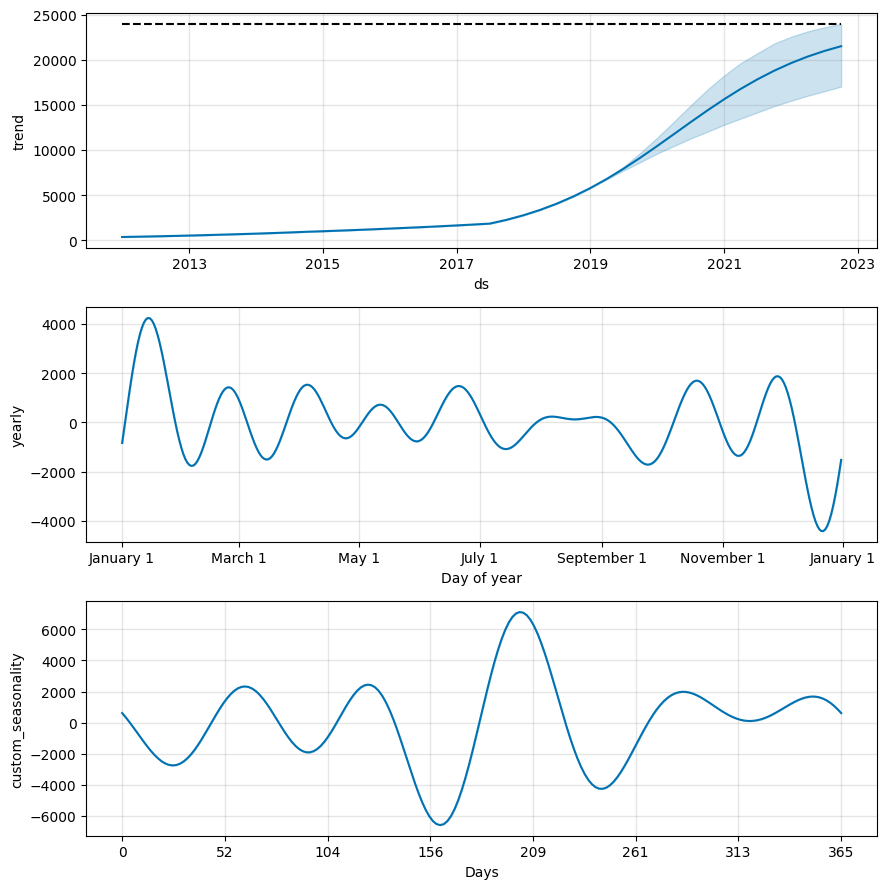

In [275]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)
model.plot_components(forecast)

In [297]:
forecast

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,custom_seasonality,custom_seasonality_lower,custom_seasonality_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,380.794437,23930,-189.510243,211.063204,380.794437,380.794437,-362.216192,-362.216192,-362.216192,885.178759,885.178759,885.178759,-1247.394952,-1247.394952,-1247.394952,0.0,0.0,0.0,18.578245
1,2012-04-01,415.346936,23930,-71.491960,332.785686,415.346936,415.346936,-276.574259,-276.574259,-276.574259,-1617.501470,-1617.501470,-1617.501470,1340.927211,1340.927211,1340.927211,0.0,0.0,0.0,138.772676
2,2012-07-01,452.974350,23930,-147.824925,240.981548,452.974350,452.974350,-409.044717,-409.044717,-409.044717,-719.871666,-719.871666,-719.871666,310.826949,310.826949,310.826949,0.0,0.0,0.0,43.929633
3,2012-10-01,494.408662,23930,97.229307,495.052353,494.408662,494.408662,-198.511332,-198.511332,-198.511332,947.549853,947.549853,947.549853,-1146.061185,-1146.061185,-1146.061185,0.0,0.0,0.0,295.897330
4,2013-01-01,539.545936,23930,259.665187,665.394340,539.545936,539.545936,-76.955540,-76.955540,-76.955540,753.513112,753.513112,753.513112,-830.468653,-830.468653,-830.468653,0.0,0.0,0.0,462.590396
5,2013-04-01,587.586903,23930,94.157324,485.099286,587.586903,587.586903,-305.280506,-305.280506,-305.280506,-1617.501470,-1617.501470,-1617.501470,1312.220964,1312.220964,1312.220964,0.0,0.0,0.0,282.306396
6,2013-07-01,640.393059,23930,54.411077,470.584903,640.393059,640.393059,-366.151073,-366.151073,-366.151073,-719.871666,-719.871666,-719.871666,353.720593,353.720593,353.720593,0.0,0.0,0.0,274.241985
7,2013-10-01,694.381488,23930,251.750646,667.754322,694.381488,694.381488,-236.916647,-236.916647,-236.916647,947.549853,947.549853,947.549853,-1184.466500,-1184.466500,-1184.466500,0.0,0.0,0.0,457.464841
8,2014-01-01,752.774304,23930,330.737872,731.957054,752.774304,752.774304,-216.975600,-216.975600,-216.975600,753.513112,753.513112,753.513112,-970.488712,-970.488712,-970.488712,0.0,0.0,0.0,535.798705
9,2014-04-01,814.479899,23930,274.801718,683.498982,814.479899,814.479899,-335.832318,-335.832318,-335.832318,-1617.501470,-1617.501470,-1617.501470,1281.669152,1281.669152,1281.669152,0.0,0.0,0.0,478.647581
